# Solutions for Lab Sheet 6 (COM3502-4502-6502 Speech Processing)

This lab sheet (solution) is part of the lecture COM[3502](http://www.dcs.shef.ac.uk/intranet/teaching/public/modules/level3/com3502.html "Open web page for COM3502 module")-[4502](http://www.dcs.shef.ac.uk/intranet/teaching/public/modules/level4/com4502.html "Open web page for COM4502 module")-[6502](http://www.dcs.shef.ac.uk/intranet/teaching/public/modules/msc/com6502.html "Open web page for COM4502 module") Speech Processing at the [University of Sheffield](https://www.sheffield.ac.uk/ "Open web page of The University of Sheffield"), Dept. of [Computer Science](https://www.sheffield.ac.uk/dcs "Open web page of Department of Computer Science, University of Sheffield").

It is probably easiest to open this Jupyter Notebook with [Google Colab](https://colab.research.google.com/notebooks/intro.ipynb#recent=true "Open in Google Colab") by clicking on the icon on the right, but this notebook is displayed best when opened locally using Jupyter Notebook (e.g. as part of the [Anaconda](https://www.anaconda.com/) distribution which is already installed on the lab computers). <a href="https://colab.research.google.com/github/sap-shef/SpeechProcesssingLab/blob/main/Lab-Sheet-Solutions/Lab-Sheet-6-Solution.ipynb"><img align="right" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open Notebook in Google Colab" title="Open and Execute the Notebook directly in Google Colaboratory"></a>

<div class="alert alert-block alert-success" id='ILOs'>
<strong>Intended Learning Objectives (ILOs):</strong><br>
    
After completing this Jupyter Notenook you should
    
<ul>
<li>be able to visualise linear and lgarithmic chirp/sweep signals in time, frequency and time-frequency domain
</li>    
<li>understand basic use of the <code>Python</code> libraries 
    <ul>
        <li><a href="https://matplotlib.org/"><code>Matplotlib</code></a> for graphical output (like 
        <a href="https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html"><code>plot()</code></a>), 
        <a href="https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.xlabel.html"><code>xlabel()</code></a>, 
        <a href="https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.ylabel.html"><code>ylabel()</code></a>, 
        <a href="https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.xlim.html"><code>xlim()</code></a>,
        <a href="https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.ylim.html"><code>ylim()</code></a>,
        <a href="https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplot.html"><code>subplot()</code></a>,
        etc.)
    </li>
    <li><a href="https://numpy.org/doc/stable/index.html"><code>Numpy</code></a> for basic mathematical functions like 
        <a href="https://numpy.org/doc/stable/reference/generated/numpy.ones.html"><code>ones()</code></a>,
    </li>
    <li><a href="https://docs.scipy.org/doc/scipy/index.html"><code>scipy.signal</code></a> commands 
        <a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.chirp.html"><code>chirp()</code></a>,  
        etc.
    </li>
    </ul>
</li>
</ul>
</div>

In [1]:
# Let's do the ususal necessary and nice-to-have imports
%matplotlib inline
import matplotlib.pyplot as plt  # plotting
import numpy as np               # math

# imports we need in addition for this lab sheet
from IPython import display as ipd
import scipy.signal as sig

import seaborn as sns; sns.set() # optional styling ((un-)comment if you want)

The following helper function was already explained in the end of [Lab Sheet 4](https://colab.research.google.com/github/sap-shef/SpeechProcesssingLab/blob/main/Lab-Sheet-Solutions/Lab-Sheet-4-Solution.ipynb) and calculates the next power of two which is longer than $L$. The function is re-provided here to be used when you want to calculate a proper DFT/FFT length.

In [2]:
# Helper function to give us the next power of two larger than the signal length 
def nextPowerOf2(L):
    '''
    Calculates the smallest power of 2 which is bigger than the length of input variable L
    
    This helper function can be used to calculate an appropriate 
    length for an DFT which is longer than the signal length L and is a power of 2.
    
    Input:
        L: int
            signal length
    Output:
        p: integer which is greater or equal than n and a power of 2
    
    Examples:
        for L in range(20):
            print('nextPowerOf2(L) for L='+str(L)+' is '+str(nextPowerOf2(L)))
            
        x=ones(11)
        L_FFT=nextPowerOf2(len(x))
    '''
    return int(np.max([2,2**np.ceil(np.log2(L))]))

## The Chirp Signal, a.k.a. Sweep Signal

The function 
\begin{equation}
\label{eq:simpleChirp}
x_{\mathrm{chirp}}(t)=\mathrm{sin}\left(\pi t^2\right) \tag{1}
\end{equation}
defines a so-called **linear-frequency [chirp](https://en.wikipedia.org/wiki/Chirp "Click here for additional information on the Chirp signal on Wikipedia")** or simply linear chirp. It is a signal that sweeps through different frequencies over time.

The instantaneous frequency $f(t)$ of this chirp signal increases exactly linearly with time, i.e. $f(t)=f_0+ a t$ with a constant $a=\frac{f_1-f_0}{t_1-t_0}$. More precisely, the instantaneous angular frequency $f(t)$ of the chirp signal at time $t$ is the derivate of the sinusoid's argument divided by $2\pi$, thus $f(t) = t$. 

The following function `generate_chirp()` implements (\ref{eq:simpleChirp}) and the successive code cell uses this function to generate a chirp signal from $t_1=0$ seconds to $t_2=8$ seconds.

In [3]:
def generate_chirp(t1=0,t2=10,fs=8000):
    '''
    Generates a chirp signal by implementing $x(t)=sin(\pi t^2)$
    
    Input:
        t1: float, optional
            start time (in seconds), default: start at 0 seconds
        t2: float, optional
            end time (in seconds), default: end at 10 seconds
        fs: float, optional
            sampling frequency in Hz, default: 8000 Hz
    Output:
        chirp signal
    
    Example use:
        x=generate_chirp(50,70,fs)
    '''
    length=t2-t1 # signlal length in seconds
    t = np.linspace(t1, t2, length*fs) # time vector from t1 to t2
    return np.sin(np.pi*t**2)

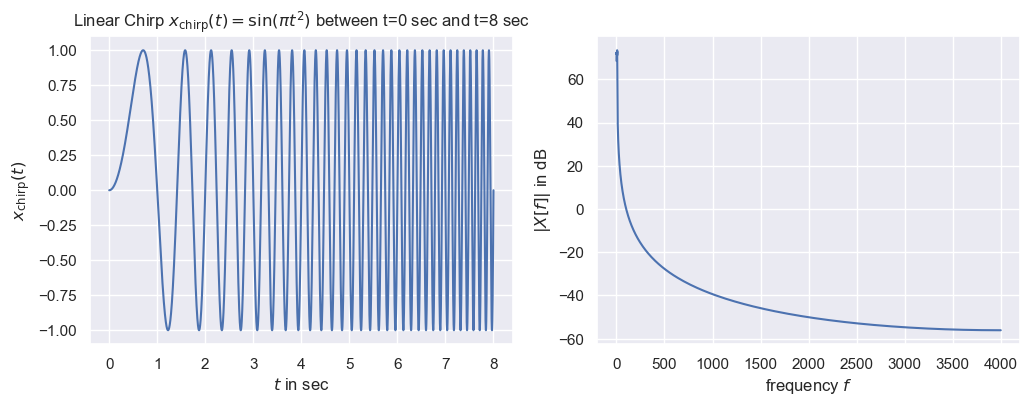

In [4]:
fs=8000      # sampling frequency
t1=0         # time 1 in seconds (start time)
t2=8         # time 2 in seconds (end time)

# use our function to generate the chirp signal
x=generate_chirp(t1,t2,fs)

# plot chirp signal
plt.figure(figsize=(12, 4))
plt.subplot(1,2,1)
t = np.linspace(t1, t2, (t2-t1)*fs) # time vector from t1 to t2 for plotting
plt.plot(t,x)
plt.ylabel('$x_{\mathrm{chirp}}(t)$')
plt.xlabel('$t$ in sec')
plt.title('Linear Chirp $x_{\mathrm{chirp}}(t)=\mathrm{sin}(\pi t^2)$ between t='+str(t1)+' sec and t='+str(t2)+' sec')

# compute and plot magnitude spectrum
L_FFT=nextPowerOf2(len(x))
X = np.fft.rfft(x,n=L_FFT)
f = np.fft.rfftfreq(L_FFT, d=1./fs)

plt.subplot(1,2,2)
plt.plot(f, 20*np.log10(np.abs(X)))
plt.xlabel('frequency $f$')
plt.ylabel('$|X[f]|$ in dB')
#plt.ylim([0, 50])
plt.grid(True)


# listen to the sound file
ipd.Audio(x, rate=fs)

The left panel of the figure above shows the generated chirp signal in time domain. A sinusoidal signal with increasing frequency over time (i.e., faster oscillations for later times $t$) is visible. The spectrum seems to be more difficult to interpret at the moment and the audio is not perceivable, but hopefully this gets clear when we experiment further.

To get more insight what happens in the fequency domain let's use the `xlim()` command to zoom into the frequency plot in the right panel above.

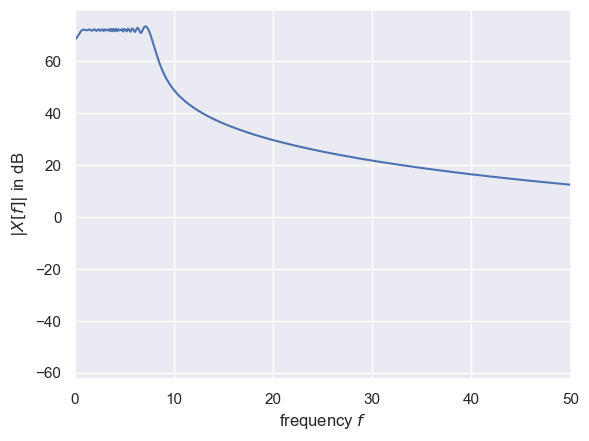

In [5]:
plt.plot(f, 20*np.log10(np.abs(X)))
plt.xlabel('frequency $f$')
plt.ylabel('$|X[f]|$ in dB')
plt.xlim([0, 50])
plt.grid(True)

We now see that actually a frequency range exists which is (more or less) flat (roughly between $0$ Hz and $\approx 8$ Hz) which is in line with the derivation of the instantaeous frequency derived above, i.e $f(t) = t$.

Note: You audio equipment (loudspeaker or headphones) can not reproduce signal with such low frequencies. This is the reason why no sound is perceived during playback of the generated chirp signal.

Let's analyse a sweep for time parameters $t_1=50$ seconds to $t_2=100$ seconds in the following.

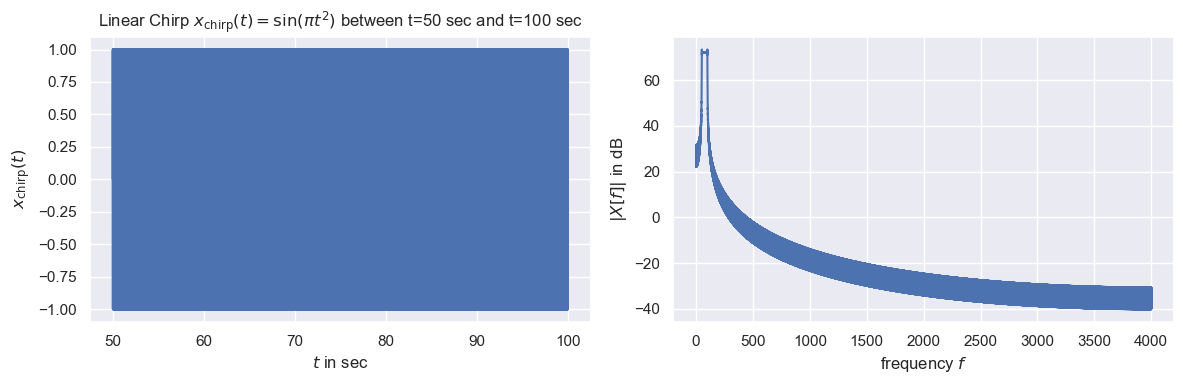

In [6]:
t1=50        # time 1 in seconds (start time)
t2=100       # time 2 in seconds (end time)

# use our function to generate the chirp signal
x=generate_chirp(t1,t2,fs)

# plot chirp signal
plt.figure(figsize=(12, 4))
plt.subplot(1,2,1)
t = np.linspace(t1, t2, (t2-t1)*fs) # time vector from t1 to t2
plt.plot(t,x)
plt.ylabel('$x_{\mathrm{chirp}}(t)$')
plt.xlabel('$t$ in sec')
plt.title('Linear Chirp $x_{\mathrm{chirp}}(t)=\mathrm{sin}(\pi t^2)$ between t='+str(t1)+' sec and t='+str(t2)+' sec')

# compute and plot magnitude spectrum
L_FFT=nextPowerOf2(len(x))
X = np.fft.rfft(x,n=L_FFT)
f = np.fft.rfftfreq(L_FFT, d=1./fs)

plt.subplot(1,2,2)
plt.plot(f, 20*np.log10(np.abs(X)))
plt.xlabel('frequency $f$')
plt.ylabel('$|X[f]|$ in dB')
#plt.ylim([0, 50])
plt.grid(True)

plt.tight_layout()

# listen to the sound file
ipd.Audio(x, rate=fs)

The left panel (chirp signal in time domain) is now no longer very intuitive because there are too many oscillations for the given length of the signal. 

However, now we should be able to perceive the signal during playback. When you listen to the signal for a certain time you should be able to perceive the increasing frequency. Note that the length of the signal is $t_1-t_2=20$ seconds.
Looking at the spectrum we now already see that there is a frequency range in which the spectrum is flat.

Again we zoom in for the spectral plot:

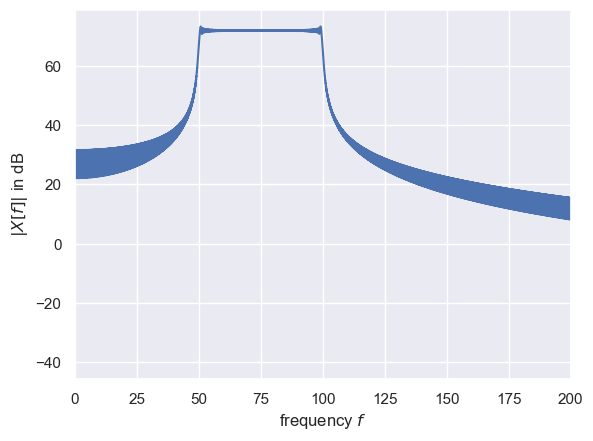

In [7]:
plt.plot(f, 20*np.log10(np.abs(X)))
plt.xlabel('frequency $f$')
plt.ylabel('$|X[f]|$ in dB')
plt.xlim([0, 200])
plt.grid(True)

Again, we see that the spectrum is flat in the analysed frequency range.

Let's try $t_1=300$ seconds to $t_2=400$ seconds.

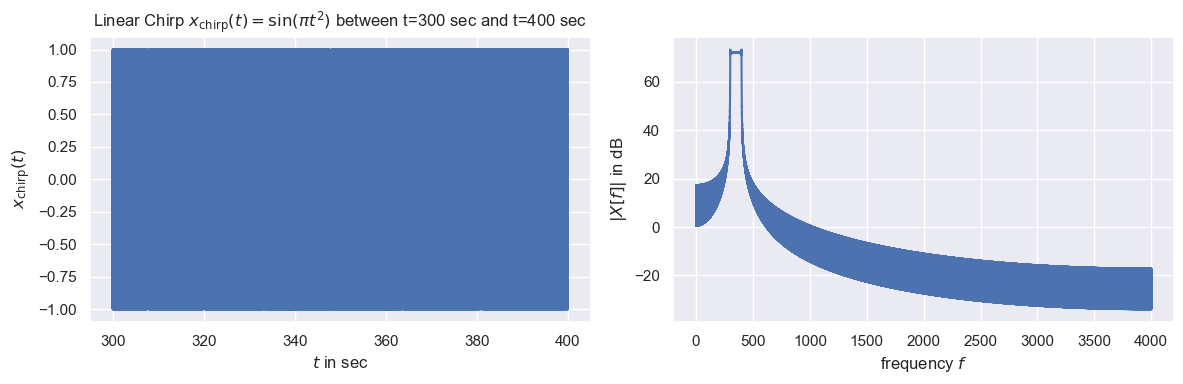

In [8]:
t1=300       # time 1 in seconds (start time)
t2=400       # time 2 in seconds (end time)

# use our function to generate the chirp signal
x=generate_chirp(t1,t2,fs)

# plot chirp signal
plt.figure(figsize=(12, 4))
plt.subplot(1,2,1)
t = np.linspace(t1, t2, (t2-t1)*fs) # time vector from t1 to t2
plt.plot(t,x)
plt.ylabel('$x_{\mathrm{chirp}}(t)$')
plt.xlabel('$t$ in sec')
plt.title('Linear Chirp $x_{\mathrm{chirp}}(t)=\mathrm{sin}(\pi t^2)$ between t='+str(t1)+' sec and t='+str(t2)+' sec')

# compute and plot magnitude spectrum
L_FFT=nextPowerOf2(len(x))
X = np.fft.rfft(x,n=L_FFT)
f = np.fft.rfftfreq(L_FFT, d=1./fs)

plt.subplot(1,2,2)
plt.plot(f, 20*np.log10(np.abs(X)))
plt.xlabel('frequency $f$')
plt.ylabel('$|X[f]|$ in dB')
#plt.ylim([0, 50])
plt.grid(True)

plt.tight_layout()

# listen to the sound file
ipd.Audio(x, rate=fs)

The frequency range is again higher (compared to the previous two examples), the frequency range through which the chirp sweeps is flat.

Note: The frequency plot (correctly) shows a flat spectrum, but we perceive that the signal is a sine, i.e. a signal with only one frequency, but varying (sweeping through the chosen frequency range) over time. Therefore, it will make sense to anaylse spectral and time bahaviour simultaneously in the following.

### Tasks 2 and 3 - SciPy's Chirp Function

The (chirp) signals created so far vary frequency with fixed *speed*. The `scipy.signal` library provides a function `chirp()` which is more flexible than the function we created before. See e.g. [here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.chirp.html) for a documentation.

The following code creates and visualises a chirp signal between $f_0=10$ Hz at $t_0=0$ seconds and $f_1=6$ Hz at $t_1=5$ seconds. Note that this the length of the length of the generated signal can be different from $t_1$.

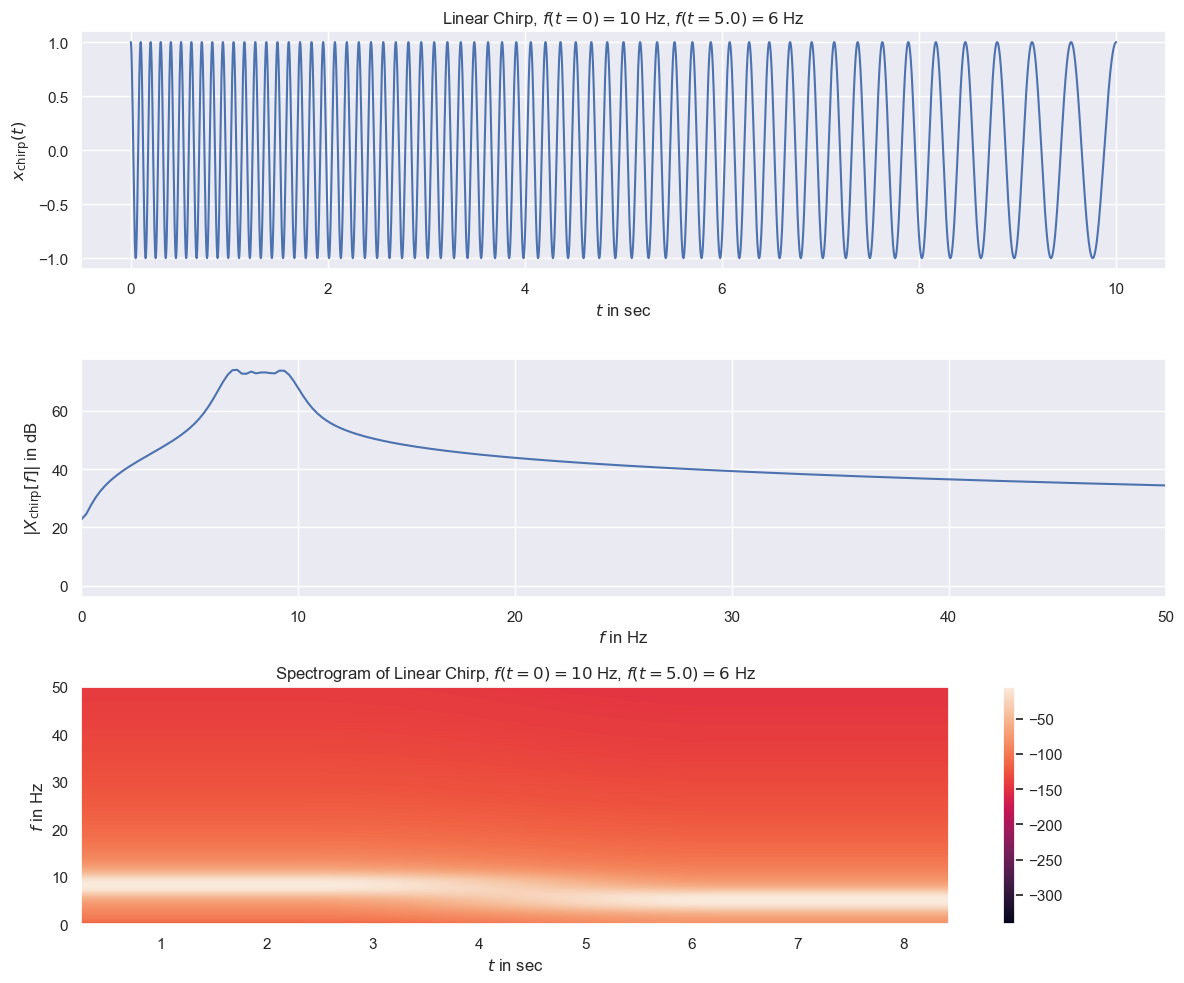

In [9]:
fs=8000   # sampling frequency
length=10 # signlal length in seconds

t = np.linspace(0, length, length*fs) # time vector

f0 = 10         # frequency in Hz at time t_0=0
f1 = 6          # frequency in Hz at time t_1
t1 = 0.5*length # frequency in Hz at time t=0
x = sig.chirp(t, f0=f0, f1=f1, t1=t1, method='linear')

# plot time domain chirp
plt.figure(figsize=(12,10))
plt.subplot(3,1,1)
plt.plot(t, x)
plt.title('Linear Chirp, $f(t=0)='+str(f0)+'$ Hz, $f(t='+str(t1)+')='+str(f1)+'$ Hz')
plt.ylabel('$x_{\mathrm{chirp}}(t)$')
plt.xlabel('$t$ in sec')

# compute and plot magnitude spectrum

L = 4*9192        # DFT length (we need a relatively large number here for high frequency resolution)
overlap = 4096  # also large overlap to get some time resolution between segments

plt.subplot(3,1,2)
f = np.fft.rfftfreq(L, 1/fs)
plt.plot(f, 20*np.log10(abs(np.fft.rfft(x,L))))
plt.xlim([0, 50])
plt.xlabel('$f$ in Hz')
plt.ylabel('$|X_{\mathrm{chirp}}[f]|$ in dB')
plt.grid(True)

# plot spectrogram of chirp
plt.subplot(3,1,3)
plt.specgram(x,NFFT=L, Fs=fs, noverlap=overlap)
plt.colorbar()  # add a colorbar to the spectrogram
plt.ylim(0,50)
plt.grid(False)
plt.title('Spectrogram of Linear Chirp, $f(t=0)='+str(f0)+'$ Hz, $f(t='+str(t1)+')='+str(f1)+'$ Hz')
plt.ylabel('$f$ in Hz')
plt.xlabel('$t$ in sec')

plt.tight_layout()

ipd.Audio(x, rate=fs) # this will not be audible since frequency range is too low.

The plots above visualise the time domain signal $x_{\mathrm{chirp}}(t)$ (top panel), the spectrum $|x_{\mathrm{chirp}}(f)|$ (middle panel) and the spectrogram (lower panel), i.e. how the chirp (it's spectrum) develops over time.

Please note that the frequency range for the chirp generated above is again too low to perceive a sound signal when playback.

The following code generates and visualises the chirp for time and frequency variables changed to $f_0 = 100$ Hz, $f_1 = 3$ kHz and $t_1 = 10$ seconds.

Note the removal of the `ylim()` command to zoom into the spectrogram in frequency direction and therefore adaptation of parameters of the spectrogram.

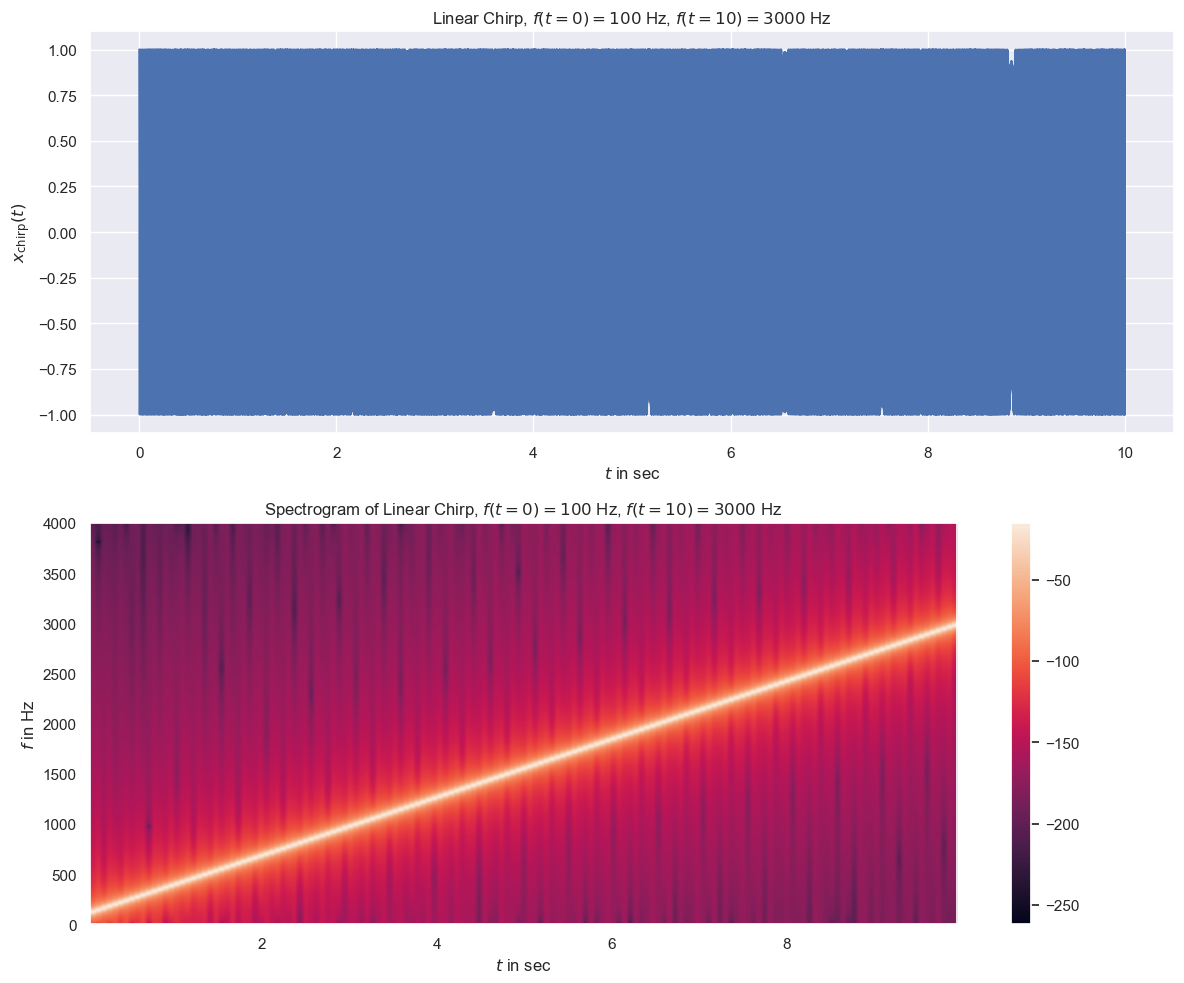

In [10]:
fs=8000   # sampling frequency
length=10 # signlal length in seconds

t = np.linspace(0, length, length*fs) # time vector

f0 = 100    # frequency in Hz at time t_0=0
f1 = 3000   # frequency in Hz at time t_1
t1 = length # frequency in Hz at time t=0

x = sig.chirp(t, f0=f0, f1=f1, t1=t1, method='linear')

# plot time domain chirp
plt.figure(figsize=(12,10))
plt.subplot(2,1,1)
plt.plot(t, x)
#plt.plot(t[0:2*1280], chp2[0:2*1280]) # only show the initial samples of the chirp
plt.title('Linear Chirp, $f(t=0)='+str(f0)+'$ Hz, $f(t='+str(t1)+')='+str(f1)+'$ Hz')
plt.ylabel('$x_{\mathrm{chirp}}(t)$')
plt.xlabel('$t$ in sec')

# plot spectrogram of chirp
L = 1024        # DFT length (since we don't want to zoom in we can take relatively 'normal' values)
overlap = 512  

plt.subplot(2,1,2) 
plt.specgram(x,NFFT=L, Fs=fs, noverlap=overlap)
plt.colorbar()  # add a colorbar to the spectrogram
#plt.ylim(0,50) 
plt.grid(False)
plt.title('Spectrogram of Linear Chirp, $f(t=0)='+str(f0)+'$ Hz, $f(t='+str(t1)+')='+str(f1)+'$ Hz')
plt.ylabel('$f$ in Hz')
plt.xlabel('$t$ in sec')

plt.tight_layout()

ipd.Audio(x, rate=fs)

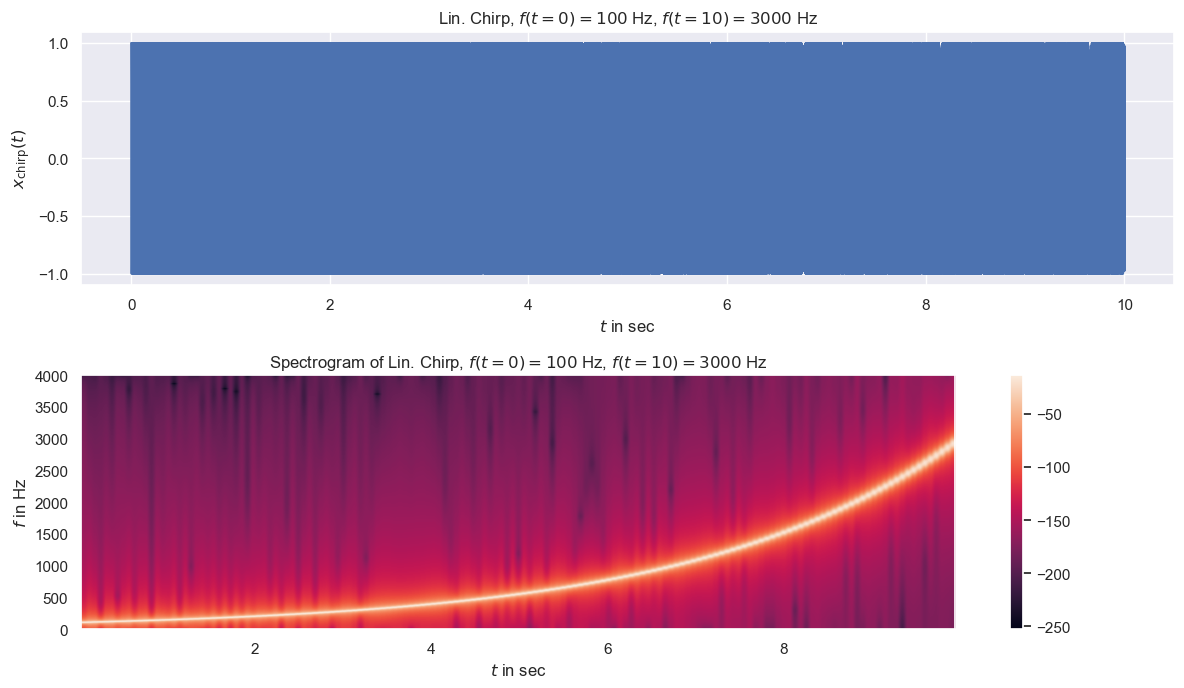

In [11]:
fs=8000   # sampling frequency
length=10 # signlal length in seconds

t = np.linspace(0, length, length*fs) # time vector

f0 = 100     # frequency in Hz at time t_0=0
f1 = 3000    # frequency in Hz at time t_1
t1 = length  # frequency in Hz at time t=0

x = sig.chirp(t, f0=f0, f1=f1, t1=length, method='logarithmic')

plt.figure(figsize=(12,10))
plt.subplot(3,1,1)
#plt.plot(t[0:2*1280], x[0:2*1280]) # only show the initial samples of the chirp
plt.plot(t, x)                         # show the whole (time domain) signal
plt.xlabel('$t$ in sec')
plt.title('Lin. Chirp, $f(t=0)='+str(f0)+'$ Hz, $f(t='+str(t1)+')='+str(f1)+'$ Hz')
plt.ylabel('$x_{\mathrm{chirp}}(t)$')

# compute and plot magnitude spectrum

L = 1024       # DFT length (we need a relatively large number here for high frequency resolution)
overlap = 512  # also large overlap to get some time resolution between segments

# plot spectrogram of chirp
plt.subplot(3,1,2)
#plt.specgram(x,Fs=fs)
plt.specgram(x,NFFT=L, Fs=fs, noverlap=overlap)
plt.colorbar()  # add a colorbar to the spectrogram
#plt.ylim(0,50)
plt.grid(False)
plt.title('Spectrogram of Lin. Chirp, $f(t=0)='+str(f0)+'$ Hz, $f(t='+str(t1)+')='+str(f1)+'$ Hz')
plt.ylabel('$f$ in Hz')
plt.xlabel('$t$ in sec')

plt.tight_layout()

ipd.Audio(x, rate=fs)

### Optional: Colorbars for Spectrograms and Controlling the Colorbar

When looking at the plots above we might want to properly align the time axes and place the colour bar. Unfortunately, `matplotlib` is not very user friendly in this respect.

Using the module `gridspec` allows to align plots that have elements with and without a colorbar. This is demonstrated by the following example, which uses the gridspec-constructor with keywords specified by the dictionary gridspec_kw. This dictionary, in turn, is one of the parameters of plt.subplots, which creates a figure and a set of subplots.

Basically, 4 axes are created and the left two are used for the time domain signal (upper left) and the spectrogram (lower left). The lower right is used for plotting the colorbar and the upper right is left empty.

In [12]:
# let's create a signal again

fs=8000   # sampling frequency
length=10 # signlal length in seconds

t = np.linspace(0, length, length*fs) # time vector

f0 = 100    # frequency in Hz at time t_0=0
f1 = 3000   # frequency in Hz at time t_1
t1 = length # frequency in Hz at time t=0

x = sig.chirp(t, f0=f0, f1=f1, t1=t1, method='linear')

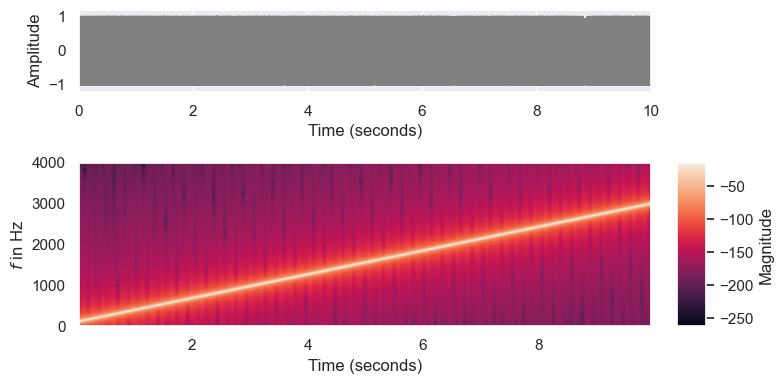

In [13]:
# create time-frequency plot with properly placed colourbar

fig, ax = plt.subplots(2, 2, gridspec_kw={'width_ratios':  [1, 0.05], 
                                          'height_ratios': [1, 2]}, figsize=(8, 4))
ax[0, 0].plot(t, x, color='gray')
ax[0, 0].set_xlabel('Time (seconds)')
ax[0, 0].set_ylabel('Amplitude')

ax[0, 0].set_xlim([min(t), max(t)])   # display the whole signal
#ax[0, 0].set_xlim([0, 0.75]) # only display the first 0.75 sec
ax[0, 0].set_ylim([-1.2, 1.2])
ax[0, 1].set_axis_off() # do not display the axis in right upper corner


spec,_,_,im = ax[1, 0].specgram(x,NFFT=1024, Fs=fs, noverlap=512)
#im = ax[1, 0].imshow(10*np.log10(spec), aspect='auto', origin='lower', extent=[t1, t2, 0, 50])
plt.colorbar(mappable=im, cax=ax[1, 1])
ax[1, 0].set_xlabel('Time (seconds)')
ax[1, 0].set_ylabel('$f$ in Hz')
ax[1, 0].grid(False)
ax[1, 1].set_ylabel('Magnitude')

plt.tight_layout()

## Copyright

This notebook is licensed under [Creative Commons Attribution 4.0](https://creativecommons.org/licenses/by/4.0/) to be used during the lecture COM[3502](http://www.dcs.shef.ac.uk/intranet/teaching/public/modules/level3/com3502.html "Open web page for COM3502 module")-[4502](http://www.dcs.shef.ac.uk/intranet/teaching/public/modules/level4/com4502.html "Open web page for COM4502 module")-[6502](http://www.dcs.shef.ac.uk/intranet/teaching/public/modules/msc/com6502.html "Open web page for COM4502 module") Speech Processing at the [University of Sheffield](https://www.sheffield.ac.uk/ "Open web page of The University of Sheffield"), Dept. of [Computer Science](https://www.sheffield.ac.uk/dcs "Open web page of Department of Computer Science, University of Sheffield"). You may download, [clone](https://docs.github.com/en/repositories/creating-and-managing-repositories/cloning-a-repository) or [fork](https://docs.github.com/en/get-started/quickstart/fork-a-repo) it to your computer or private [GitHub](https://github.com/) account. 